In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import blpapipd.blpapipd as bapd
import blpapipd.plot_utilities as pu

In [2]:
# initialize BBG data session
s = bapd.initBBGSession()

Found bbcomm.exe, no need to launch it
Connecting to LocalHost:8194


In [3]:
hy_trr    = bapd.getTimeSeries(s,'LF98TRUU Index','PX_LAST')
hy_oas_d  = bapd.getTimeSeries(s,'LF98OAS Index','PX_LAST')
hy_er_mtd = bapd.getTimeSeries(s,'LF98ER Index','PX_LAST')

ig_trr    = bapd.getTimeSeries(s,'LD06TRUU Index','PX_LAST',19830729)
ig_oas    = bapd.getTimeSeries(s,'LD06OAS Index','PX_LAST',19830729)
ig_er_mtd =  bapd.getTimeSeries(s,'LD06ER Index','PX_LAST',19830729)


LF98TRUU Index PX_LAST 19500101 20221119 DAILY did not load...creating cache.
LF98OAS Index PX_LAST 19500101 20221119 DAILY did not load...creating cache.
LF98ER Index PX_LAST 19500101 20221119 DAILY did not load...creating cache.
LD06TRUU Index PX_LAST 19830729 20221119 DAILY did not load...creating cache.
LD06OAS Index PX_LAST 19830729 20221119 DAILY did not load...creating cache.
LD06ER Index PX_LAST 19830729 20221119 DAILY did not load...creating cache.


In [4]:
hy_er_df                 = hy_er_mtd.resample('M').last().to_frame(name='eret_m')
hy_er_df['eret_m+1']     = (hy_er_df/100.0+1)
hy_er_df['cmpnd_eret_a'] = hy_er_df.groupby(pd.Grouper(freq="A-DEC"))["eret_m+1"].apply(lambda g: g.cumprod().iloc[-1])
hy_er_df['% a_ret']      = (hy_er_df['cmpnd_eret_a'].dropna()-1)*100
hy_er_df.tail(24)

,eret_m,eret_m+1,cmpnd_eret_a,% a_ret
2020-12-31,1.90,1.0190,1.018497,1.849665
2021-01-31,0.62,1.0062,NaN,NaN
2021-02-28,1.15,1.0115,NaN,NaN
2021-03-31,0.83,1.0083,NaN,NaN
2021-04-30,0.70,1.0070,NaN,NaN
2021-05-31,0.08,1.0008,NaN,NaN
2021-06-30,1.22,1.0122,NaN,NaN
2021-07-31,-0.34,0.9966,NaN,NaN
2021-08-31,0.66,1.0066,NaN,NaN
2021-09-30,0.53,1.0053,NaN,NaN


-34.842272271409115
59.83312943579935


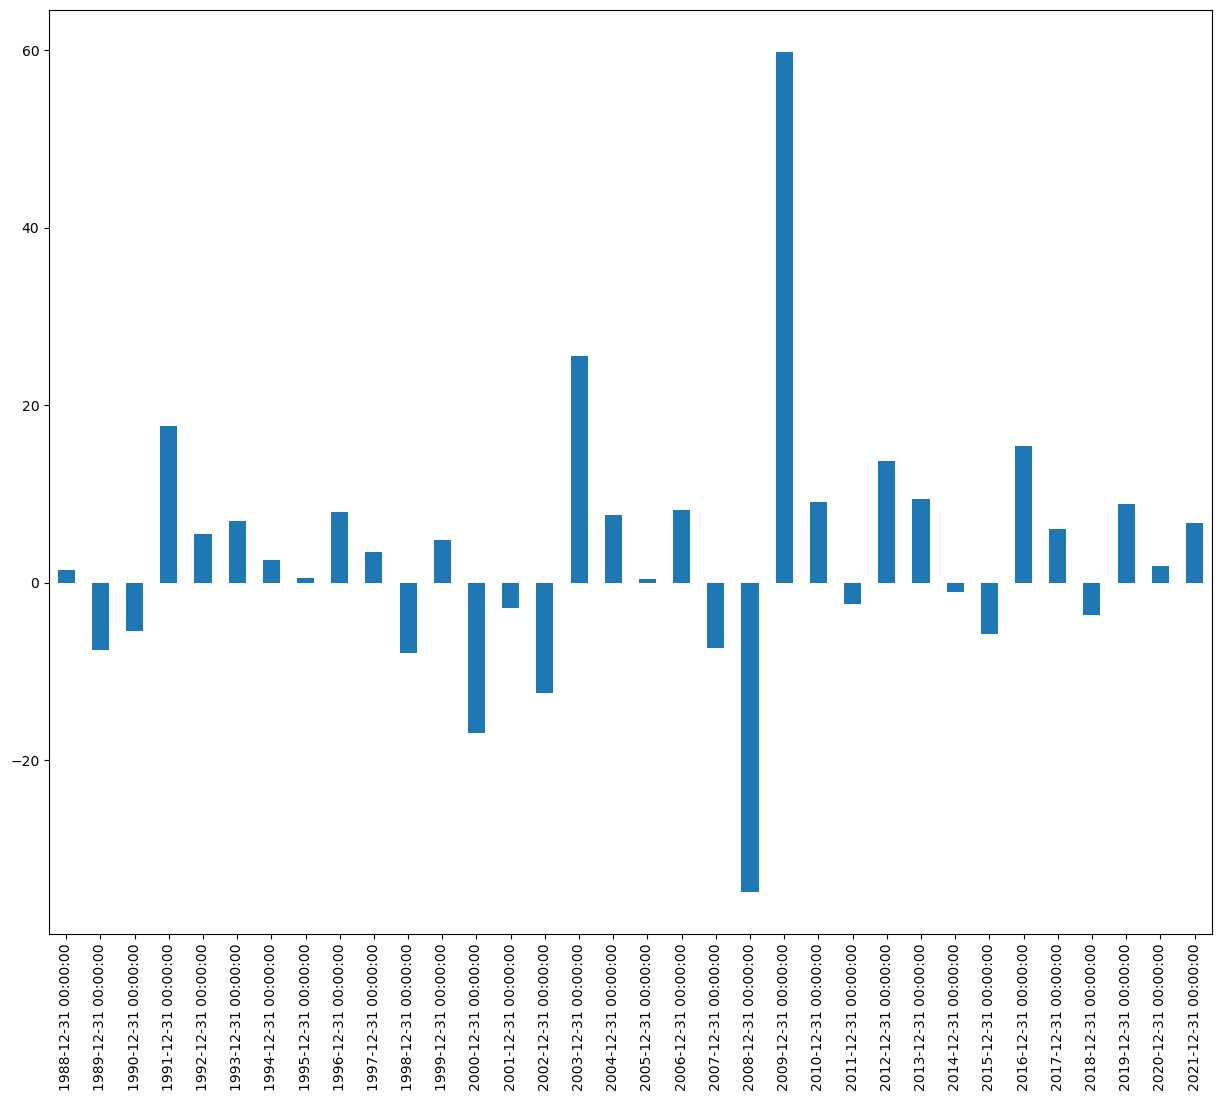

In [5]:
hy_er_df['% a_ret'].dropna().plot(kind='bar',figsize=(15,12))

print(hy_er_df['% a_ret'].min())
print(hy_er_df['% a_ret'].max())

<AxesSubplot:>

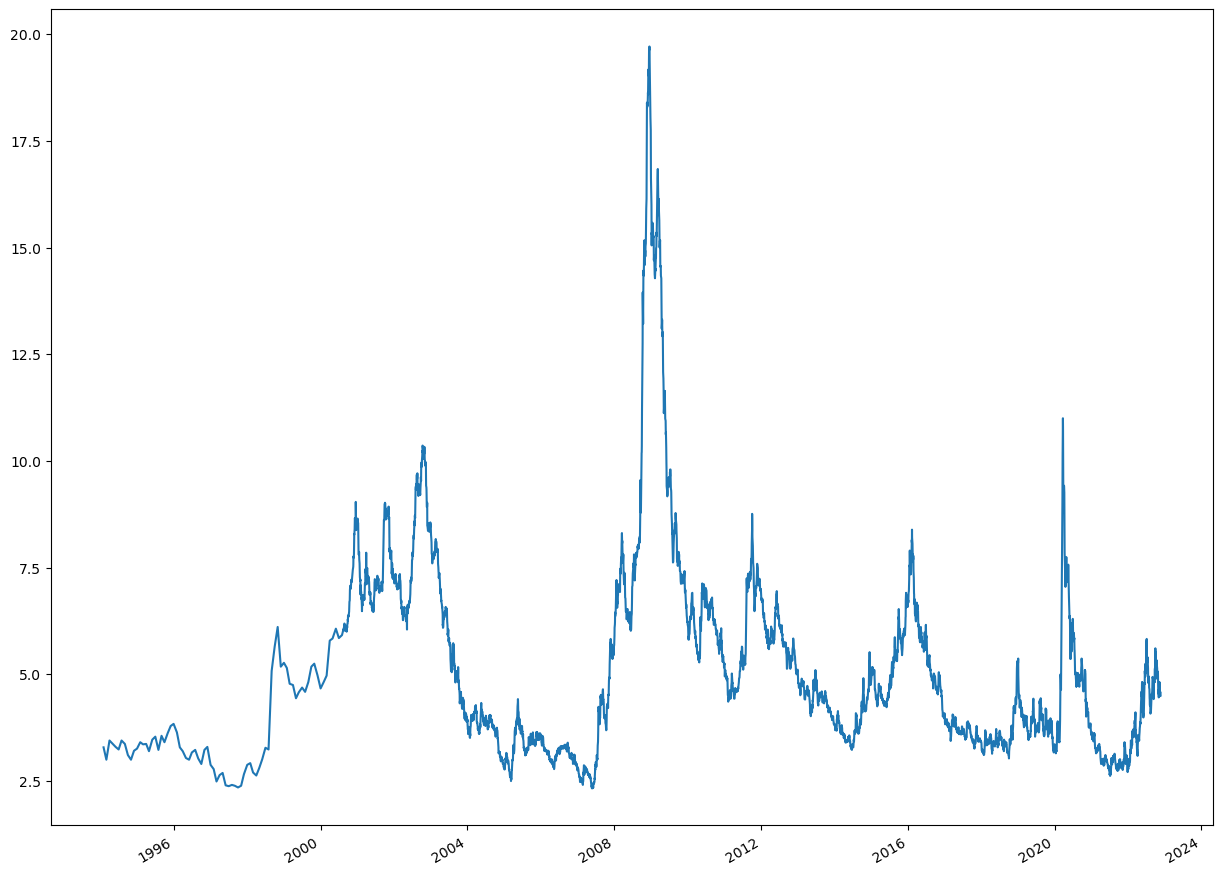

In [6]:
hy_oas_d.plot(figsize=(15,12))

In [7]:
ig_er_df                 = ig_er_mtd.resample('M').last().to_frame(name='eret_m')
ig_er_df['eret_m+1']     = (ig_er_df/100.0+1)
ig_er_df['cmpnd_eret_a'] = ig_er_df.groupby(pd.Grouper(freq="A-DEC"))["eret_m+1"].apply(lambda g: g.cumprod().iloc[-1])
ig_er_df['% a_ret']      = (ig_er_df['cmpnd_eret_a'].dropna()-1)*100
ig_er_df.tail(24)

,eret_m,eret_m+1,cmpnd_eret_a,% a_ret
2020-12-31,0.52,1.0052,1.009319,0.931899
2021-01-31,-0.02,0.9998,NaN,NaN
2021-02-28,0.20,1.0020,NaN,NaN
2021-03-31,-0.15,0.9985,NaN,NaN
2021-04-30,0.27,1.0027,NaN,NaN
2021-05-31,0.28,1.0028,NaN,NaN
2021-06-30,0.31,1.0031,NaN,NaN
2021-07-31,-0.11,0.9989,NaN,NaN
2021-08-31,0.02,1.0002,NaN,NaN
2021-09-30,0.15,1.0015,NaN,NaN


-15.470794205811622
19.82584696809746


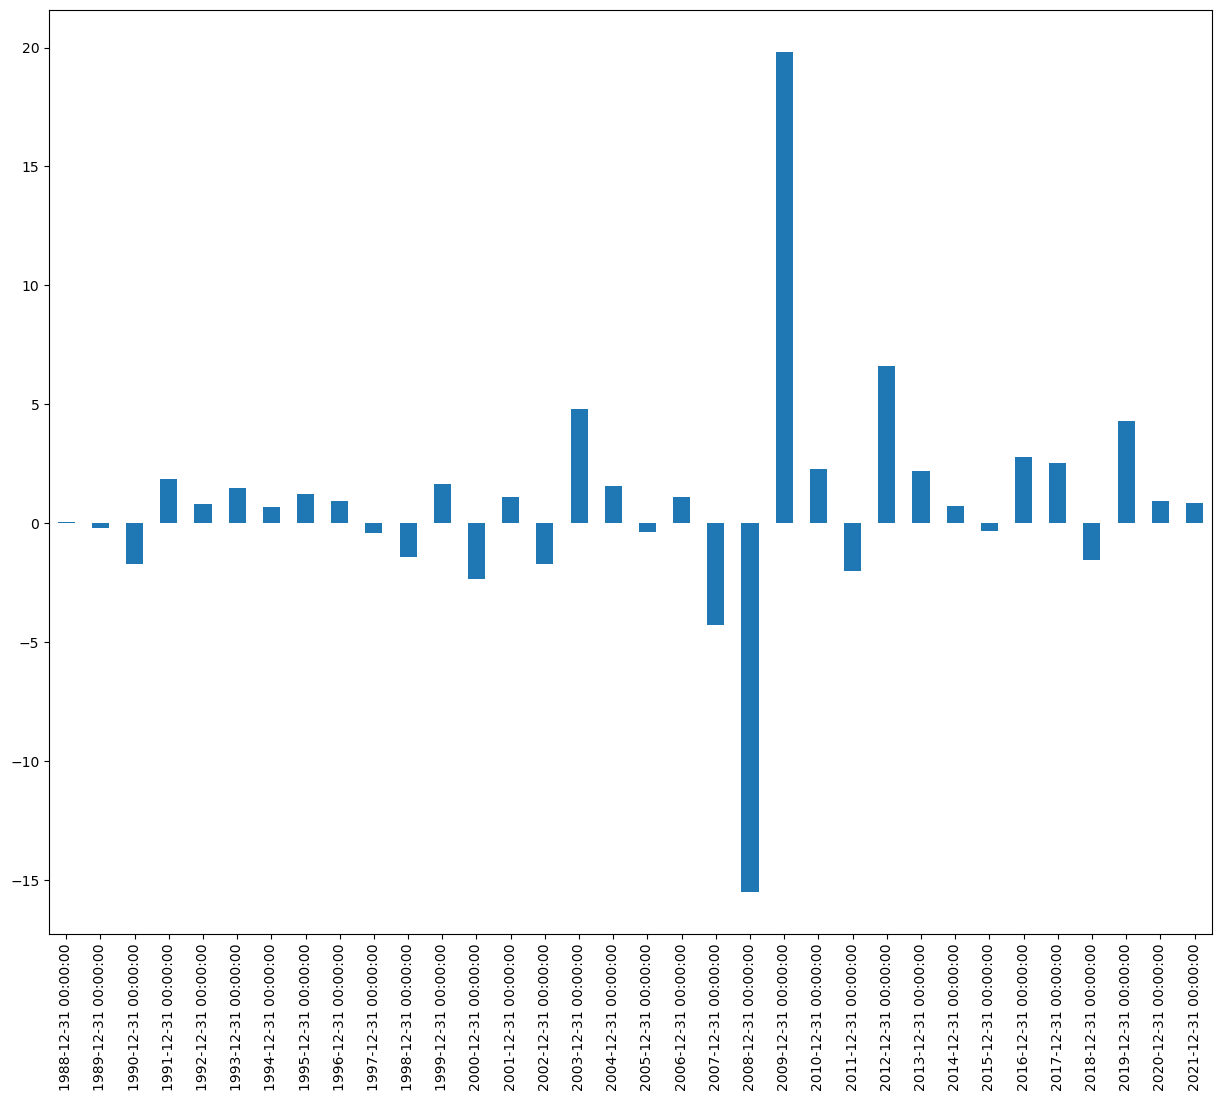

In [8]:
ig_er_df['% a_ret'].dropna().plot(kind='bar',figsize=(15,12))

print(ig_er_df['% a_ret'].min())
print(ig_er_df['% a_ret'].max())

<AxesSubplot:>

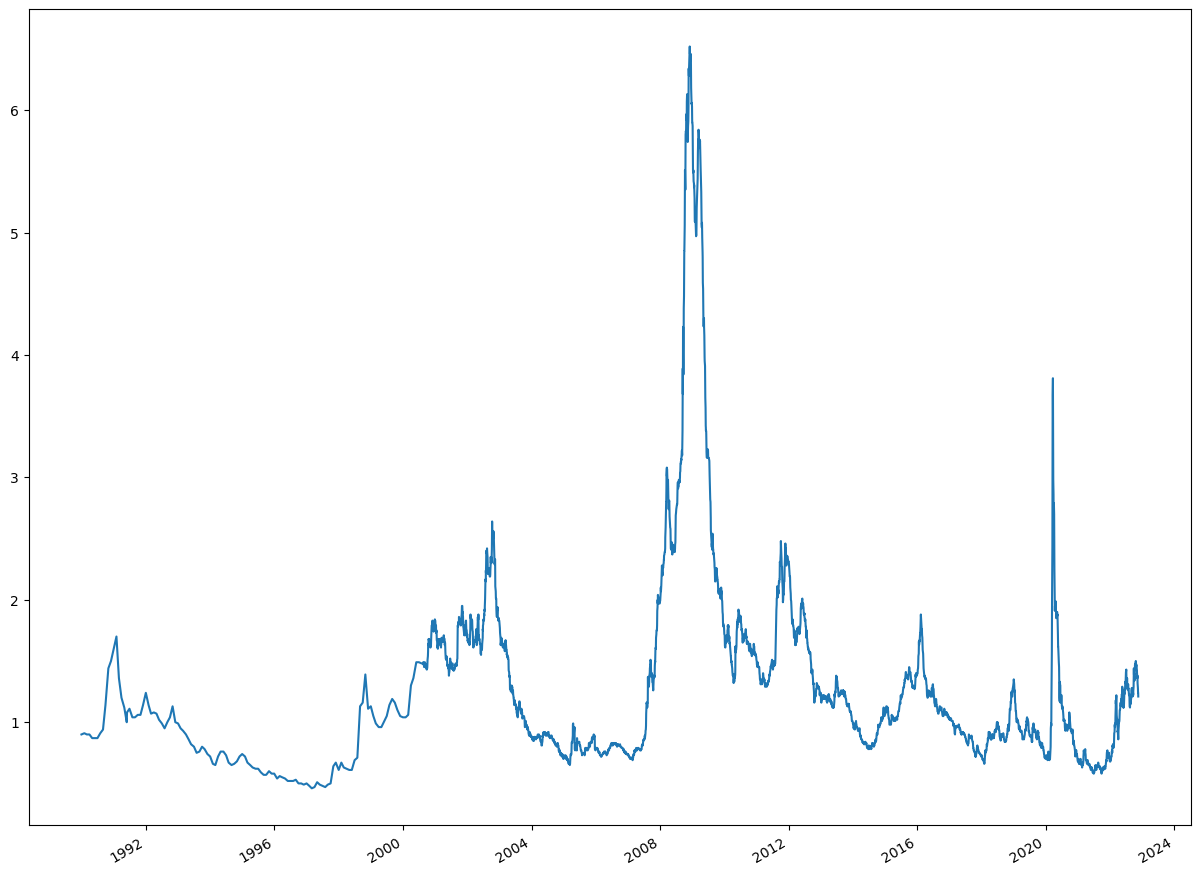

In [9]:
ig_oas.plot(figsize=(15,12))

In [10]:
hy_ret_risk = ((hy_er_df['eret_m+1']-1)*100.0).std()
ig_ret_risk = ((ig_er_df['eret_m+1']-1)*100.0).std()

print(hy_ret_risk)
print(ig_ret_risk)
hy_ig_ratio=hy_ret_risk/ig_ret_risk
print(hy_ig_ratio)

2.674452096944445
0.9428764872480789
2.8364819073495187


0    0.135864
dtype: float64


<AxesSubplot:>

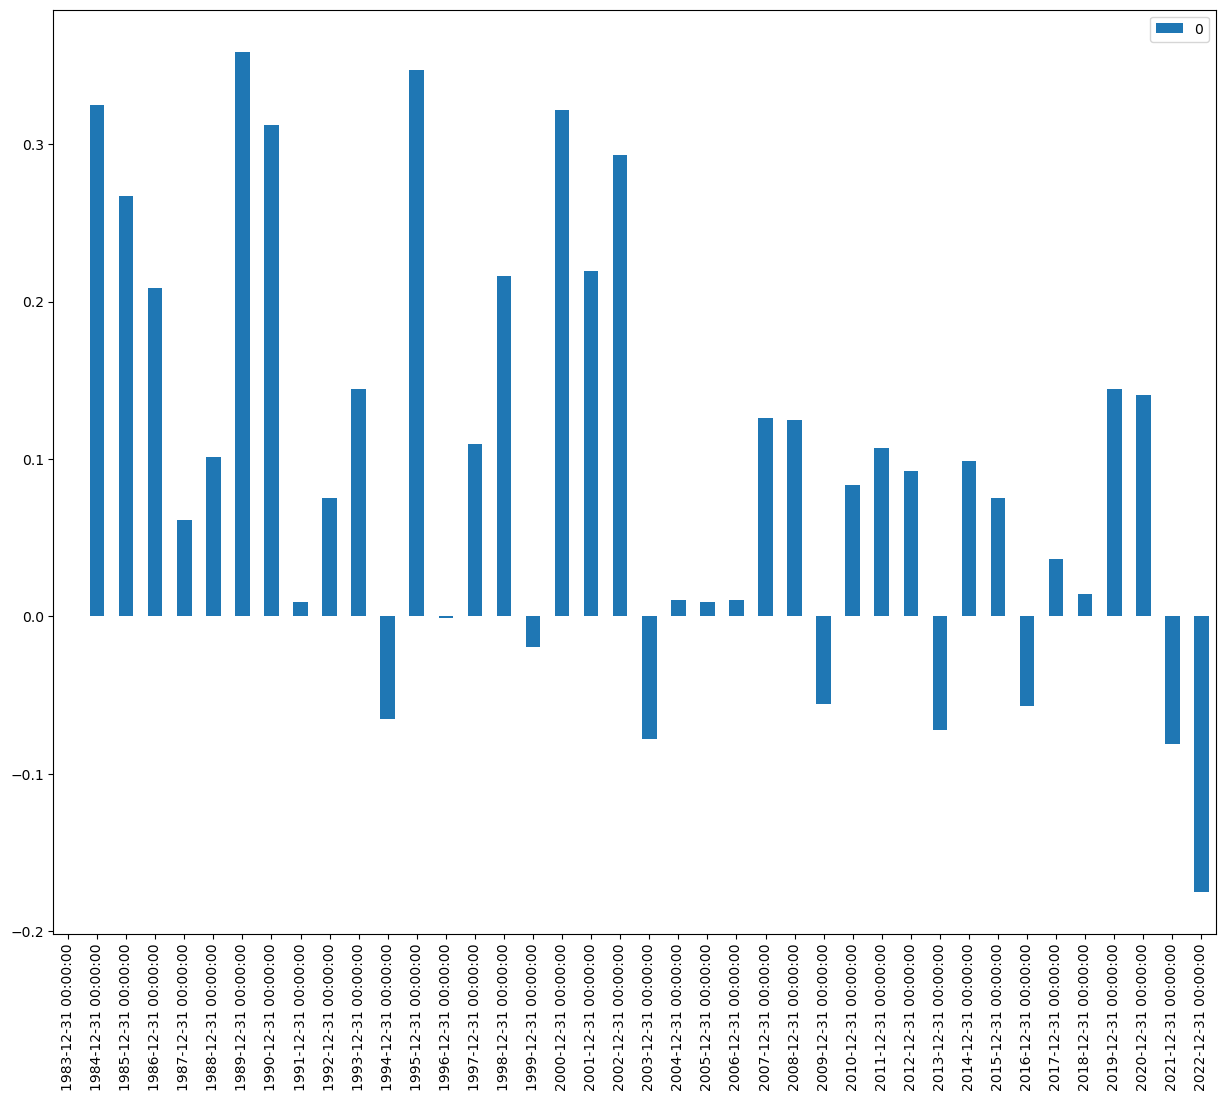

In [11]:
hy_trr_m = hy_trr.to_frame().resample('A').last().pct_change()
ig_trr_m = ig_trr.to_frame().resample('A').last().pct_change()

lvd_ig=hy_ig_ratio*ig_trr_m-hy_trr_m
print(lvd_ig.std())
lvd_ig.plot(kind='bar',figsize=(15,12))

0.00013005285210807515


Text(0.5, 1.0, 'E[ 1.36 x IG Annual TRR - HY Annual TRR ] = 0.0')

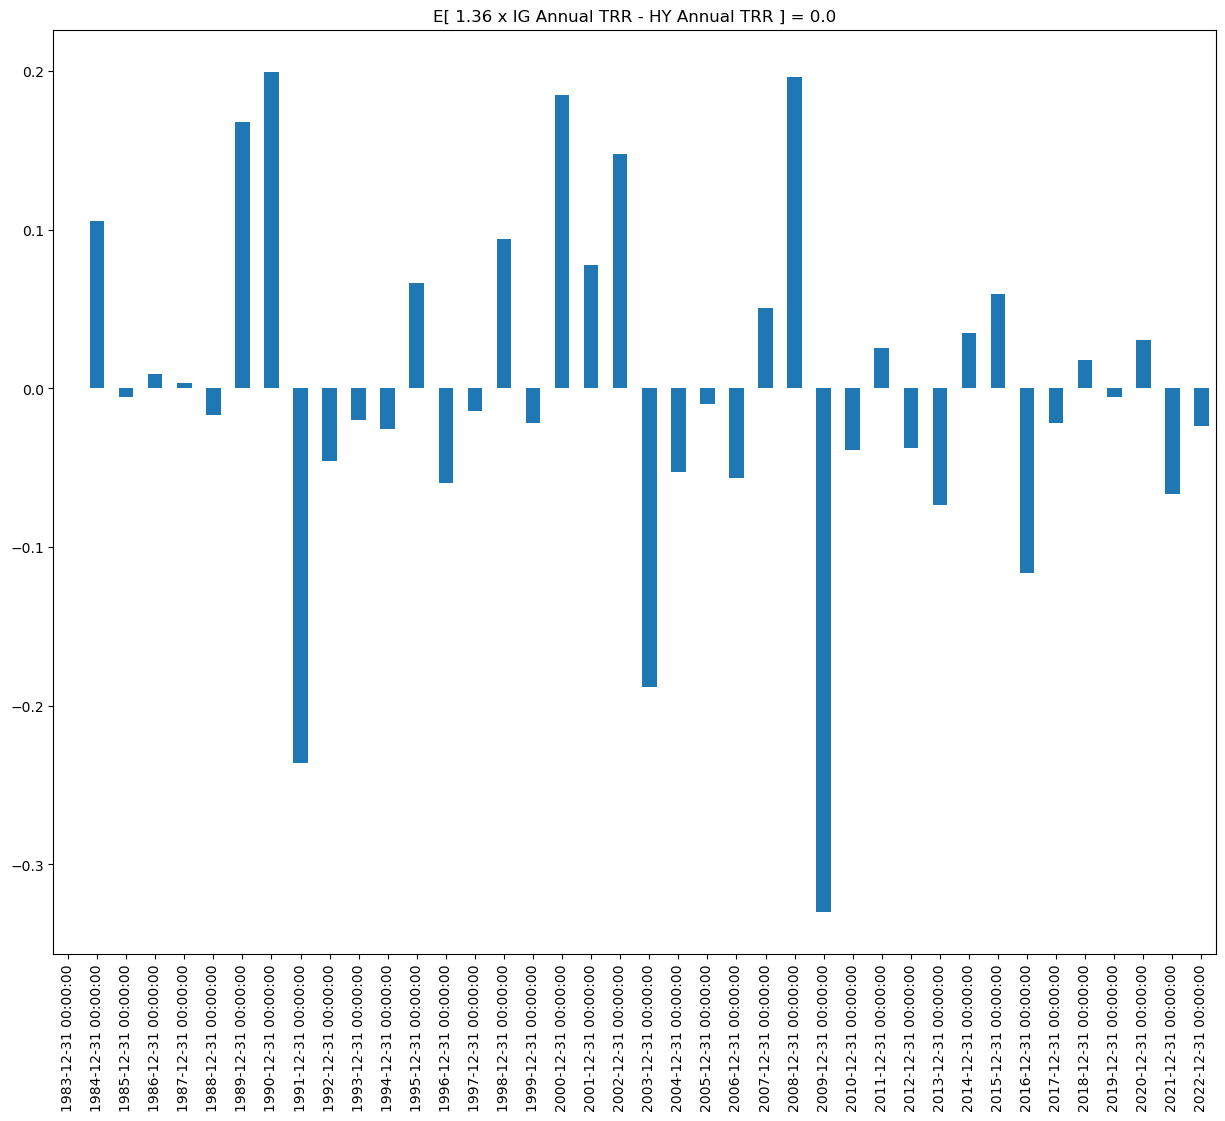

In [12]:
hy_trr_a = hy_trr.resample('A-DEC').last().pct_change()
ig_trr_a = ig_trr.resample('A-DEC').last().pct_change()

lvd_ig=1.36*ig_trr_a-hy_trr_a

print(np.mean(lvd_ig))
lvd_ig.plot(kind='bar',figsize=(15,12))
plt.title('E[ 1.36 x IG Annual TRR - HY Annual TRR ] = 0.0')